# From AIPC to the Cloud

In this notebook, we'll train a CIFAR-10 image classification model using AI-powered computing (AIPC) and cloud resources. CIFAR-10 is a benchmark dataset with 60,000 images across 10 classes. Leveraging cloud infrastructure enables faster training and scalability.

We'll cover dataset preprocessing, CNN model design, training with AIPC, and evaluation. This guide provides insights into optimizing model performance and deploying in production.

Extracted from Pytorch example https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### Considerations 

Training a model with a limited amount of data is a pragmatic approach, especially if you're in the early stages of model development or data collection. It allows you to quickly iterate and experiment with different model architectures, hyperparameters, and feature engineering techniques to identify what works best for your problem domain.

Once you have a good understanding of what works and what doesn't, scaling up to a larger dataset can indeed be beneficial. More data often leads to better generalization and performance, as it helps the model learn more robust patterns and relationships within the data.

However, there are a few considerations to keep in mind:

- **Quality of Data**: Ensure that your limited dataset is representative of the broader population or distribution you're targeting. Biases or outliers in the limited dataset can skew the model's understanding and lead to poor generalization when scaling up.

- **Overfitting**: With a limited dataset, there's a risk of overfitting—where the model learns to memorize the training data rather than generalize to unseen examples. Regularization techniques and validation strategies should be employed to mitigate this risk.

- **Transferability**: Ideally, the insights gained from training on the limited dataset should transfer well to the larger dataset. However, there may be domain shifts or differences in data distribution between the two datasets, requiring careful adaptation and fine-tuning of the model.
- **Computational Resources**: Training with a larger dataset typically requires more computational resources in terms of processing power, memory, and time. Ensure you have the necessary infrastructure to handle the increased scale.

In summary, starting with a limited dataset for initial experimentation is a great approach, but it's essential to validate the model's performance on a larger dataset to ensure robustness and generalization. Additionally, continuous monitoring and refinement may be necessary as you scale up to address any new challenges or nuances introduced by the larger dataset.

## 1. Installation of libraries

In [3]:
!pip install matplotlib
!pip install pylibjpeg-libjpeg
!pip install libpng-bins
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.3 MB/s eta 0:00:0000:0100:01


## 2. Import libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

/home/ubuntu/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3. Load and prepare data sets for AIPC and Cloud examples

We'll work with two versions of the CIFAR-10 dataset:

1. **Short Dataset (for AI-powered computing)**:
   This version comprises a subset of the CIFAR-10 dataset, containing a smaller number of images per class. It's designed for quick experimentation and testing on AI-powered computing resources.

2. **Complete Dataset (for cloud computing)**:
   The complete CIFAR-10 dataset consists of 60,000 images, evenly distributed across 10 classes. This version provides comprehensive training data and is suitable for training on cloud computing resources.

By using these two datasets, we can efficiently utilize the resources available on both AI-powered computing and cloud platforms, ensuring rapid experimentation and robust model training.

Let's load the datasets and proceed with our analysis.


In [3]:
### For Cloud we will use the entire Dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset_Cloud = torchvision.datasets.CIFAR10(root='./data_cloud', train=True,
                                        download=True, transform=transform)

trainloader_Cloud = torch.utils.data.DataLoader(trainset_Cloud, batch_size=batch_size, shuffle=True)

testset_cloud = torchvision.datasets.CIFAR10(root='./data_cloud', train=False,
                                       download=True, transform=transform)
testloader_cloud = torch.utils.data.DataLoader(testset_cloud, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Display each dataset size
print("Cloud Trainset size: ", len(trainset_Cloud)," images")
print("Cloud Testset size: ", len(testset_cloud)," images")

100%|██████████| 170498071/170498071 [00:21<00:00, 8075351.71it/s] 


Extracting ./data_cloud/cifar-10-python.tar.gz to ./data_cloud
Files already downloaded and verified
Cloud Trainset size:  50000  images
Cloud Testset size:  10000  images


In [4]:
## For AI PC we will use a portion (40%  20,000) of the initial dataset

from sklearn.model_selection import train_test_split

# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Initialize the CIFAR-10 dataset and download it
full_dataset = torchvision.datasets.CIFAR10(root='./data_ai_pc', train=True,
                                             download=True, transform=transform)

# Size of the first subset
train_size_AI_PC = 5000

# Get the labels for each sample in the full dataset
labels = torch.tensor(full_dataset.targets)

# Use stratified sampling to split the dataset into train and test sets
train_indices, test_indices = train_test_split(range(len(full_dataset)), train_size=train_size_AI_PC,test_size=2000,
                                               stratify=labels, random_state=42)

# Create the train and test subsets using the selected indices
trainset_AI_PC = torch.utils.data.Subset(full_dataset, train_indices)
testset_AI_PC = torch.utils.data.Subset(full_dataset, test_indices)

# Create the dataloaders
batch_size = 4
trainloader_AI_PC = torch.utils.data.DataLoader(trainset_AI_PC, batch_size=batch_size, shuffle=True)
testloader_AI_PC = torch.utils.data.DataLoader(testset_AI_PC, batch_size=batch_size, shuffle=False)

# Print the number of samples in each subset
print("Number of samples in trainset_AI_PC:", len(trainset_AI_PC))
print("Number of samples in testset_AI_PC:", len(testset_AI_PC))

100%|██████████| 170498071/170498071 [00:07<00:00, 21479633.21it/s]


Extracting ./data_ai_pc/cifar-10-python.tar.gz to ./data_ai_pc
Number of samples in trainset_AI_PC: 5000
Number of samples in testset_AI_PC: 2000


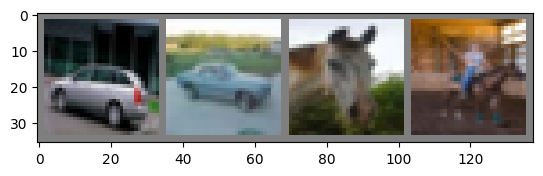

car   car   horse horse


In [5]:
# Display dataset
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader_AI_PC)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# 4.  Define Neural Network and optimizer

In this cell, we define a convolutional neural network (CNN) model using PyTorch. Below is a breakdown of the model definition:

1. **Module Definition**: The model is defined as a subclass of `nn.Module`, the base class for all neural network modules in PyTorch.

2. **Initialization Method (`__init__`)**:
   - The `__init__` method initializes the neural network layers, including convolutional layers, max-pooling layers, and fully connected layers.
   - It sets up the architecture of the model, comprising two convolutional layers (`conv1` and `conv2`), two max-pooling layers (`pool`), and three fully connected layers (`fc1`, `fc2`, and `fc3`).

3. **Forward Method (`forward`)**:
   - The `forward` method defines the forward pass of the network, specifying how input data flows through the layers to produce the output.
   - It applies convolutional operations, ReLU activation functions, max-pooling, and flattening to transform the input data.
   - Finally, it computes the output of the neural network.
   
This model architecture is a common design for image classification tasks, leveraging convolutional layers to extract features from input images and fully connected layers for classification.


In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 5. Training and Testing on XPU

In this section, we will train and test our CIFAR-10 model, named `model_ipex_XXXX` (_aipc/cloud) 

### Training Process
1. **Data Loading**: We'll load the training dataset and set up data loaders to provide batches of images and labels to the model during training.
2. **Model Initialization**: Initialize an instance of our neural network model `model_ipex_XXX`.
3. **Optimizer Configuration**: We'll set up an optimizer for training. In this case, we'll use the `ipex.optimize` function provided by IPEX to optimize our model, utilizing the `torch.bfloat16` data type.
4. **Training Loop**: Iterate over the training dataset, passing batches of data through the model, computing gradients, and updating model parameters to minimize the loss.
5. **Monitoring Progress**: Monitor training metrics such as loss and accuracy to assess the model's performance during training.

### Testing Process
1. **Data Loading**: Load the testing dataset to evaluate the trained model's performance.
2. **Model Evaluation**: Pass testing data through the trained model and compute predictions.
3. **Performance Metrics**: Calculate performance metrics such as accuracy to evaluate the model's performance on unseen data.


## 5.1 AI PC 



### 5.1.1 Training 
The NN will be trained using intel IPEX for aditional optimizations.

In [ ]:
import intel_extension_for_pytorch as ipex
import torch.optim as optim

model_ipex_aipc = Net()

#Convert model to run on GPU
model_ipex_aipc = model_ipex_aipc.to('xpu')

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ipex_aipc.parameters(), lr=0.001, momentum=0.9)

# Invoke optimize function against the model object and optimizer object
model_ipex_aipc, optimizer = ipex.optimize(model_ipex_aipc, optimizer=optimizer, dtype=torch.bfloat16)

In [ ]:
# Calculate execution time
import time

start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_AI_PC, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data

        #Convert Data Set to run on GPU
        inputs = inputs.to('xpu',dtype=torch.bfloat16)
        labels = labels.to('xpu')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_ipex_aipc(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 700 == 699:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
#calculate execution time
end_time = time.time()
execution_time = end_time - start_time

print(f'Execution time: {execution_time} seconds')
print(f'Length of the dataset: {len(trainset_AI_PC)}')
print('Finished Training')

### 5.1.2 Test 

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

start_time = time.time()
# again no gradients needed
with torch.no_grad():
    for data in testloader_AI_PC:
        images, labels = data

        # Convert to run on GPU
        images = images.to('xpu',dtype=torch.bfloat16)
        labels = labels.to('xpu')
        outputs = model_ipex_aipc(images)
        _, predictions = torch.max(outputs, 1)

        # collect the correct predictions for each class and convert to XPU bfloat 16
        predictions = predictions.to('xpu',dtype=torch.bfloat16)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#calculate execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Execution time: {execution_time} seconds')

## 5.2 Cloud

### 5.2.1  Training

In [ ]:
import intel_extension_for_pytorch as ipex
import torch.optim as optim

model_ipex_cloud = Net()

#Convert model to run on GPU
model_ipex_cloud = model_ipex_cloud.to('xpu')

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ipex_cloud.parameters(), lr=0.001, momentum=0.9)

# Invoke optimize function against the model object and optimizer object
model_ipex_cloud, optimizer = ipex.optimize(model_ipex_cloud, optimizer=optimizer, dtype=torch.bfloat16)

In [ ]:
# Calculate execution time
import time

start_time = time.time()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_Cloud, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        #Convert Data Set to run on GPU
        inputs = inputs.to('xpu',dtype=torch.bfloat16)
        labels = labels.to('xpu')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_ipex_cloud(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 700 == 699:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
#calculate execution time
end_time = time.time()
execution_time = end_time - start_time

print(f'Execution time: {execution_time} seconds')
print(f'Length of the dataset: {len(trainset_AI_PC)}')
print('Finished Training')

### 5.2.2 Test

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

start_time = time.time()
# again no gradients needed
with torch.no_grad():
    for data in testloader_cloud:
        images, labels = data

        # Convert to run on GPU
        images = images.to('xpu',dtype=torch.bfloat16)
        labels = labels.to('xpu')
        outputs = model_ipex_cloud(images)
        _, predictions = torch.max(outputs, 1)

        # collect the correct predictions for each class
        predictions = predictions.to('xpu',dtype=torch.bfloat16)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class            
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#calculate execution time
end_time = time.time()
execution_time = end_time - start_time

print(f'Execution time: {execution_time} seconds')

# 6 Training and testing on CPU only

In this section, we will train and test our CIFAR-10 model, named `model_ipex_XXXX` (_aipc/cloud) 

### Training Process
1. **Data Loading**: We'll load the training dataset and set up data loaders to provide batches of images and labels to the model during training.
2. **Model Initialization**: Initialize an instance of our neural network model `model_ipex_XXX`.
3. **Optimizer Configuration**: We'll set up an optimizer for training. In this case, we'll use the `ipex.optimize` function provided by IPEX to optimize our model, utilizing the `torch.bfloat16` data type.
4. **Training Loop**: Iterate over the training dataset, passing batches of data through the model, computing gradients, and updating model parameters to minimize the loss.
5. **Monitoring Progress**: Monitor training metrics such as loss and accuracy to assess the model's performance during training.

### Testing Process
1. **Data Loading**: Load the testing dataset to evaluate the trained model's performance.
2. **Model Evaluation**: Pass testing data through the trained model and compute predictions.
3. **Performance Metrics**: Calculate performance metrics such as accuracy to evaluate the model's performance on unseen data.

In [18]:
# instalation of IPEX for CPU only according to https://intel.github.io/intel-extension-for-pytorch/index.html#installation?platform=cpu&version=v2.2.0%2bcpu&os=linux%2fwsl2&package=pip

# Uninstall actual version of pytorch
!pip uninstall torch torchvision torchaudio -y

# install version 2.2.0 of pytorch and IPEX
!pip install torch==2.2.0+cpu torchvision torchaudio -f https://download.pytorch.org/whl/cpu/torch_stable.html
!pip install intel-extension-for-pytorch
!pip install oneccl_bind_pt --extra-index-url https://pytorch-extension.intel.com/release-whl/stable/cpu/us/

# DON'T FORGET TO RESTART THE KERNEL!!

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
  Using cached https://download.pytorch.org/whl/cpu/torch-2.2.0%2Bcpu-cp310-cp310-linux_x86_64.whl (186.7 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.18.0%2Bcpu-cp310-cp310-linux_x86_64.whl (1.6 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.3.0%2Bcpu-cp310-cp310-linux_x86_64.whl (1.7 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.18.0-cp310-cp310-manylinux1_x86_64.whl.metadata (6.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 101.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requireme

## 6.1 AI PC

### 6.1.1 Training

The NN will be trained using intel IPEX for aditional optimizations.

In [17]:
import intel_extension_for_pytorch as ipex
import torch.optim as optim
import torch

model_ipex_aipc = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ipex_aipc.parameters(), lr=0.001, momentum=0.9)

# Invoke optimize function against the model object and optimizer object
model_ipex_aipc, optimizer = ipex.optimize(model_ipex_aipc, optimizer=optimizer, dtype=torch.bfloat16)

In [18]:
# Calculate execution time
import time

start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_AI_PC, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data
        optimizer.zero_grad()
        
        # Train on CPU
        with torch.cpu.amp.autocast():
            output = model_ipex_aipc(inputs)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
        
        

        # print statistics
        running_loss += loss.item()
        if i % 700 == 699:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
#calculate execution time
end_time = time.time()
execution_time = end_time - start_time

print(f'Execution time: {execution_time} seconds')
print(f'Length of the dataset: {len(trainset_AI_PC)}')
print('Finished Training')

[1,   700] loss: 0.806
[2,   700] loss: 0.718
Execution time: 7.9886462688446045 seconds
Length of the dataset: 5000
Finished Training


### 6.1.2 Test

In [19]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

model_ipex_aipc.eval() 

start_time = time.time()

with torch.no_grad():
    for data in testloader_AI_PC:
        images, labels = data
        with torch.cpu.amp.autocast():
            outputs = model_ipex_aipc(images)
            _, predictions = torch.max(outputs, 1)  # Get predicted labels

            for label, prediction in zip(labels, predictions):
                if label == prediction.item():  # Convert prediction to Python scalar
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# calculate execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Execution time: {execution_time} seconds')


Accuracy for class: plane is 72.0 %
Accuracy for class: car   is 16.5 %
Accuracy for class: bird  is 6.0 %
Accuracy for class: cat   is 5.5 %
Accuracy for class: deer  is 22.5 %
Accuracy for class: dog   is 30.5 %
Accuracy for class: frog  is 53.0 %
Accuracy for class: horse is 38.0 %
Accuracy for class: ship  is 27.5 %
Accuracy for class: truck is 27.5 %
Execution time: 0.4601593017578125 seconds


## 6.2 Cloud

### 6.2.1 Training

In [20]:
import intel_extension_for_pytorch as ipex
import torch.optim as optim
import torch

model_ipex_cloud = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ipex_cloud.parameters(), lr=0.001, momentum=0.9)

# Invoke optimize function against the model object and optimizer object
model_ipex_cloud, optimizer = ipex.optimize(model_ipex_cloud, optimizer=optimizer, dtype=torch.bfloat16)

In [21]:
# Calculate execution time
import time

start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_Cloud, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data
        optimizer.zero_grad()
        # Train on CPU
        with torch.cpu.amp.autocast():
            output = model_ipex_cloud(inputs)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
        
       

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
#calculate execution time
end_time = time.time()
execution_time = end_time - start_time

print(f'Execution time: {execution_time} seconds')
print(f'Length of the dataset: {len(trainset_Cloud)}')
print('Finished Training')

[1,  2000] loss: 2.240
[1,  4000] loss: 1.923
[1,  6000] loss: 1.677
[1,  8000] loss: 1.579
[1, 10000] loss: 1.482
[1, 12000] loss: 1.462
[2,  2000] loss: 1.394
[2,  4000] loss: 1.382
[2,  6000] loss: 1.324
[2,  8000] loss: 1.328
[2, 10000] loss: 1.323
[2, 12000] loss: 1.325
Execution time: 79.64300084114075 seconds
Length of the dataset: 50000
Finished Training


### 6.2.2 Test

In [22]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
model_ipex_cloud.eval() 

start_time = time.time()

with torch.no_grad():
    for data in testloader_cloud:
        images, labels = data
        with torch.cpu.amp.autocast():
            outputs = model_ipex_cloud(images)
            _, predictions = torch.max(outputs, 1)  # Get predicted labels

            for label, prediction in zip(labels, predictions):
                if label == prediction.item():  # Convert prediction to Python scalar
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# calculate execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Execution time: {execution_time} seconds')

Accuracy for class: plane is 69.5 %
Accuracy for class: car   is 73.3 %
Accuracy for class: bird  is 23.6 %
Accuracy for class: cat   is 15.7 %
Accuracy for class: deer  is 39.9 %
Accuracy for class: dog   is 64.0 %
Accuracy for class: frog  is 66.0 %
Accuracy for class: horse is 71.5 %
Accuracy for class: ship  is 55.7 %
Accuracy for class: truck is 59.9 %
Execution time: 2.2864999771118164 seconds
